In [1]:
!ls

sample_data


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [4]:
mnist_train_images = mnist_train.drop('6',axis=1)

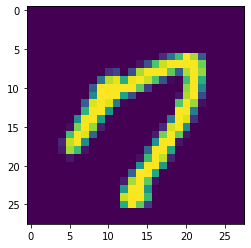

In [5]:
plt.imshow(mnist_train_images.iloc[1].to_numpy().reshape(28,28))

In [6]:
mnist_train['6']

0        5
1        7
2        9
3        5
4        2
        ..
19994    0
19995    1
19996    2
19997    9
19998    5
Name: 6, Length: 19999, dtype: int64

In [7]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(784,)),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10,activation='softmax')
])

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [14]:
mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv')
X_train = mnist_train_images/255;
y_train = mnist_train['6']


In [15]:
mnist_test

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
X_test = mnist_test.drop('7',axis =1)/255;
y_test = mnist_test['7']

In [17]:
r = model.fit(x=X_train,y=y_train,epochs=20,validation_data=(X_test,y_test),)

Epoch 1/20
625/625 [==============================] - 3s 4ms/step - loss: 0.9655 - accuracy: 0.6962 - val_loss: 0.3397 - val_accuracy: 0.9061
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3606 - accuracy: 0.8971 - val_loss: 0.2431 - val_accuracy: 0.9329
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 0.2740 - accuracy: 0.9219 - val_loss: 0.2023 - val_accuracy: 0.9415
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 0.2308 - accuracy: 0.9337 - val_loss: 0.1745 - val_accuracy: 0.9487
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1931 - accuracy: 0.9436 - val_loss: 0.1622 - val_accuracy: 0.9537
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1691 - accuracy: 0.9502 - val_loss: 0.1482 - val_accuracy: 0.9572
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1474 - accuracy: 0.9550 - val_loss: 0.1351 - val_accuracy: 0.9594
Epoch 

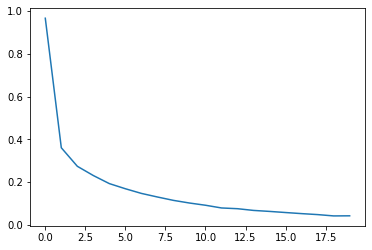

In [18]:
plt.plot(r.history['loss'])